In [1]:
from itertools import combinations, groupby

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import spatial

from pymutspec.draw import plot_mutspec192, plot_mutspec12, sbs_orders

In [2]:
%matplotlib inline

### Load cold and warm species

In [3]:
df_species = pd.read_csv('../data/Species_by_climate_zones.txt', sep='\s', quoting=True)
df_species.columns = df_species.columns.str.replace('"', '')
for c in df_species.columns:
    df_species[c] = df_species[c].str.replace('"', '')
df_species

/tmp/ipykernel_15450/3748924397.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_species = pd.read_csv('../data/Species_by_climate_zones.txt', sep='\s', quoting=True)


,Species,Climate_zone,Group
0,Scombrops_gilberti,temperate,Cold
1,Gobio_soldatovi,temperate,Cold
2,Coilia_brachygnathus,subtropical,Warm
3,Stolephorus_waitei,tropical,Warm
4,Chaenogobius_annularis,temperate,Cold
...,...,...,...
328,Misgurnus_fossilis,temperate,Cold
329,Dussumieria_elopsoides,subtropical,Warm
330,Epinephelus_fuscoguttatus,tropical,Warm
331,Rastrelliger_kanagurta,tropical,Warm


In [4]:
# check how many Chondrichthyes_7777 species we have
df_info = pd.read_csv('../../192/1data_derivation/dataset/info.csv')
df_info['Class'] = df_info.taxa.apply(lambda x: x.split(';')[1])
df_info['Species'] = df_info['species'].str.replace(' ', '_')
df_info.merge(df_species, 'right').query('Class == "Chondrichthyes_7777"')

,acc,gene,taxa,species,Class,Species,Climate_zone,Group
39,OP007033.1.8094.8777_WKR33577.1,A6,Chordata_7711;Chondrichthyes_7777;Carcharhinif...,Carcharhinus leucas,Chondrichthyes_7777,Carcharhinus_leucas,subtropical,Warm
40,OP007122.1.5461.7017_WKR34727.1,CO1,Chordata_7711;Chondrichthyes_7777;Carcharhinif...,Carcharhinus leucas,Chondrichthyes_7777,Carcharhinus_leucas,subtropical,Warm
41,OP007009.1.8777.9562_WKR33263.1,CO3,Chordata_7711;Chondrichthyes_7777;Carcharhinif...,Carcharhinus leucas,Chondrichthyes_7777,Carcharhinus_leucas,subtropical,Warm
42,OP006883.1.14352.15496_WKR31622.1,Cytb,Chordata_7711;Chondrichthyes_7777;Carcharhinif...,Carcharhinus leucas,Chondrichthyes_7777,Carcharhinus_leucas,subtropical,Warm
43,OP007018.1.2843.3817_WKR33379.1,ND1,Chordata_7711;Chondrichthyes_7777;Carcharhinif...,Carcharhinus leucas,Chondrichthyes_7777,Carcharhinus_leucas,subtropical,Warm
44,OP007104.1.4029.5073_WKR34496.1,ND2,Chordata_7711;Chondrichthyes_7777;Carcharhinif...,Carcharhinus leucas,Chondrichthyes_7777,Carcharhinus_leucas,subtropical,Warm
45,OP006780.1.10344.11724_WKR30282.1,ND4,Chordata_7711;Chondrichthyes_7777;Carcharhinif...,Carcharhinus leucas,Chondrichthyes_7777,Carcharhinus_leucas,subtropical,Warm
46,OP006957.1.11933.13762_WKR32581.1,ND5,Chordata_7711;Chondrichthyes_7777;Carcharhinif...,Carcharhinus leucas,Chondrichthyes_7777,Carcharhinus_leucas,subtropical,Warm
47,OP006882.1.14279.13758_WKR31615.1,ND6,Chordata_7711;Chondrichthyes_7777;Carcharhinif...,Carcharhinus leucas,Chondrichthyes_7777,Carcharhinus_leucas,subtropical,Warm
307,KC992792.1.5517.7079_AGQ46032.1,CO1,Chordata_7711;Chondrichthyes_7777;Myliobatifor...,Neotrygon kuhlii,Chondrichthyes_7777,Neotrygon_kuhlii,tropical,Warm


### Read file with calculated mutational spectrum from NeMu pipline

In [5]:
mutspecs = pd.read_csv('~/192/1data_derivation/dataset/MutSpecVertebrates192.csv.gz')
mutspecs = mutspecs[mutspecs.Class == 'Actinopteri']
mutspecs.to_csv('../data/MutSpecVertebrates192fish.csv.gz')
mutspecs = mutspecs.merge(df_species)
mutspecs = mutspecs.fillna(0)
mutspecs

,Gene,Class,Species,Mut,Observed,Expected,MutSpec,Climate_zone,Group
0,CO1,Actinopteri,Thymallus_thymallus,A[A>C]A,0.0,0.000000,0.0,temperate,Cold
1,CO1,Actinopteri,Thymallus_thymallus,A[A>C]C,0.0,0.000000,0.0,temperate,Cold
2,CO1,Actinopteri,Thymallus_thymallus,A[A>C]G,0.0,0.000000,0.0,temperate,Cold
3,CO1,Actinopteri,Thymallus_thymallus,A[A>C]T,0.0,0.000000,0.0,temperate,Cold
4,CO1,Actinopteri,Thymallus_thymallus,C[A>C]A,0.0,13.125000,0.0,temperate,Cold
...,...,...,...,...,...,...,...,...,...
56635,ND2,Actinopteri,Xiphias_gladius,G[T>G]T,0.0,0.990964,0.0,temperate,Cold
56636,ND2,Actinopteri,Xiphias_gladius,T[T>G]A,0.0,5.000000,0.0,temperate,Cold
56637,ND2,Actinopteri,Xiphias_gladius,T[T>G]C,0.0,3.102410,0.0,temperate,Cold
56638,ND2,Actinopteri,Xiphias_gladius,T[T>G]G,0.0,8.963855,0.0,temperate,Cold


In [6]:
mutspecs.Gene.value_counts()/192

Cytb    218.0
ND2      31.0
CO1      29.0
CO3      17.0
Name: Gene, dtype: float64

In [7]:
species_cnt = (mutspecs.groupby(['Gene', 'Group']).Species.count().unstack() / 192).astype(int)
species_cnt.to_csv('../data/species_spectra_cnt_per_groups.csv')
species_cnt

Group,Cold,Warm
Gene,,
CO1,18,11
CO3,12,5
Cytb,99,119
ND2,20,11


### check correlation with msa len and mut cnt

In [8]:
ms12 = pd.read_csv('../data/MutSpecVertebrates12fish.csv')#.query('Gene == "Cytb"')
ms12

,Gene,Class,Species,Mut,Observed,TreeLeaves,MSAsize,Expected,MutSpec
0,Cytb,Actinopteri,Scombrops_gilberti,A>C,4.00000,68,1140,70.955882,0.032648
1,Cytb,Actinopteri,Scombrops_gilberti,A>G,21.60250,68,1140,111.147059,0.112560
2,Cytb,Actinopteri,Scombrops_gilberti,A>T,2.00000,68,1140,70.955882,0.016324
3,Cytb,Actinopteri,Scombrops_gilberti,C>A,3.00000,68,1140,86.323529,0.020127
4,Cytb,Actinopteri,Scombrops_gilberti,C>G,0.00000,68,1140,86.323529,0.000000
...,...,...,...,...,...,...,...,...,...
13375,CO1,Actinopteri,Chaenogobius_annularis,G>C,0.00000,69,1545,14.565217,0.000000
13376,CO1,Actinopteri,Chaenogobius_annularis,G>T,0.00000,69,1545,14.565217,0.000000
13377,CO1,Actinopteri,Chaenogobius_annularis,T>A,0.99829,69,1545,99.550725,0.014540
13378,CO1,Actinopteri,Chaenogobius_annularis,T>C,14.99973,69,1545,227.710145,0.095509


In [9]:
metainfo = pd.read_csv('../data/meta.csv')#.query('Gene == "Cytb"')
metainfo

,acc,Gene,taxa,Species,Class,TreeLeaves,MSAsize
0,KJ564270.1.5498.7090_AHN07125.1,CO1,Chordata_7711;Actinopteri_186623;Anguilliforme...,Anguilla_anguilla,Actinopteri,46,1590
1,KJ564205.1.5490.7082_AHN06280.1,CO1,Chordata_7711;Actinopteri_186623;Anguilliforme...,Anguilla_rostrata,Actinopteri,26,1590
2,MG856856.1.<1.>652_AVI25143.1,CO1,Chordata_7711;Actinopteri_186623;Anguilliforme...,Rhynchoconger_gracilior,Actinopteri,10,651
3,OM037484.1.<1.>677_UHR49554.1,CO1,Chordata_7711;Actinopteri_186623;Anguilliforme...,Gymnothorax_intesi,Actinopteri,12,675
4,OM037524.1.<1.>674_UHR49594.1,CO1,Chordata_7711;Actinopteri_186623;Anguilliforme...,Gymnothorax_prionodon,Actinopteri,10,672
...,...,...,...,...,...,...,...
1110,AB719390.1.1.1146_BAM75257.1,Cytb,Chordata_7711;Chondrichthyes_7777;Carcharhinif...,Prionace_glauca,Chondrichthyes,85,1143
1111,KY067520.1.14343.15487_ARM58328.1,Cytb,Chordata_7711;Chondrichthyes_7777;Lamniformes_...,Carcharodon_carcharias,Chondrichthyes,9,1143
1112,KC992792.1.14438.15580_AGQ46041.1,Cytb,Chordata_7711;Chondrichthyes_7777;Myliobatifor...,Neotrygon_kuhlii,Chondrichthyes,124,1119
1113,KR676444.1.14364.15506_AKO71923.1,Cytb,Chordata_7711;Chondrichthyes_7777;Rajiformes_7...,Beringraja_pulchra,Chondrichthyes,11,1140


In [10]:
ps_df = ms12.groupby(['Gene', 'Species'])[['Observed', 'Expected']].sum()
ps_df['ps'] = ps_df['Observed'] / ps_df['Expected']
ps_df = ps_df.reset_index().merge(metainfo, on=['Gene', 'Species'])
ps_df.loc[ps_df.MSAsize < 800, 'Gene'] = 'CO1 partial'
ps_df

,Gene,Species,Observed,Expected,ps,acc,taxa,Class,TreeLeaves,MSAsize
0,CO1 partial,Acanthemblemaria_aspera,25.938320,506.600000,0.051201,HM197575.1.<1.>663_ADK20772.1,Chordata_7711;Actinopteri_186623;Blenniiformes...,Actinopteri,20,663
1,CO1 partial,Acantopsis_rungthipae,43.071236,489.647059,0.087964,MF510010.1.<1.>645_AWS05078.1,Chordata_7711;Actinopteri_186623;Cypriniformes...,Actinopteri,17,645
2,CO1 partial,Aculeola_nigra,39.999030,481.500000,0.083072,KU737592.1.<1.>655_AMQ49278.1,Chordata_7711;Chondrichthyes_7777;Squaliformes...,Chondrichthyes,28,654
3,CO1 partial,Acyrtops_amplicirrus,11.998200,494.000000,0.024288,HM389382.1.<1.>655_ADJ32717.1,Chordata_7711;Actinopteri_186623;Blenniiformes...,Actinopteri,11,651
4,CO1 partial,Ageneiosus_lineatus,11.941015,462.222222,0.025834,MN460915.1.<1.>613_QFS20580.1,Chordata_7711;Actinopteri_186623;Siluriformes_...,Actinopteri,9,612
...,...,...,...,...,...,...,...,...,...,...
1110,Cytb,Xiphias_gladius,20.808420,837.538462,0.024845,EU224088.1.1.1141_ABW97067.1,Chordata_7711;Actinopteri_186623;Istiophorifor...,Actinopteri,13,1140
1111,Cytb,Xiphophorus_hellerii,33.467392,728.250000,0.045956,EF017548.1.1.1140_ABM05590.1,Chordata_7711;Actinopteri_186623;Cyprinodontif...,Actinopteri,28,1026
1112,Cytb,Zacco_platypus,41.854282,831.454545,0.050339,AB734081.1.25.>1193_BAR64341.1,Chordata_7711;Actinopteri_186623;Cypriniformes...,Actinopteri,22,1140
1113,Cytb,Zebrus_zebrus,87.451869,812.404255,0.107646,MW196335.1.<1.>1117_QTR92943.1,Chordata_7711;Actinopteri_186623;Gobiiformes_1...,Actinopteri,47,1116


<Axes: xlabel='MSAsize', ylabel='ps'>

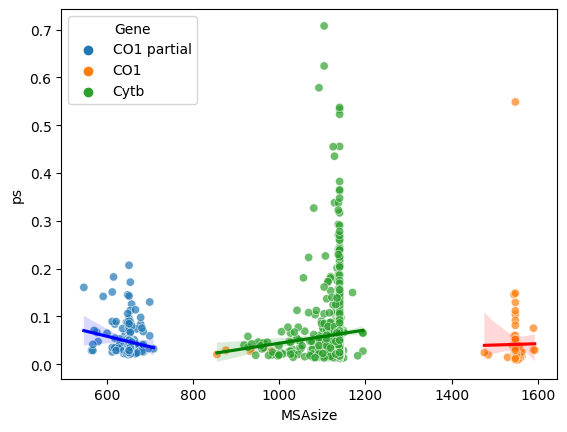

In [11]:
sns.scatterplot(ps_df, y='ps', x='MSAsize', hue='Gene', alpha=0.7)
sns.regplot(ps_df.query('MSAsize < 800'), y='ps', x='MSAsize', color='blue', scatter=False)
sns.regplot(ps_df.query('800 < MSAsize < 1200'), y='ps', x='MSAsize', color='green', scatter=False)
sns.regplot(ps_df.query('MSAsize > 1200'), y='ps', x='MSAsize', color='red', scatter=False)
# sns.scatterplot(ps_df.query('800 < MSAsize < 1200'), x='ps', y='MSAsize')
# plt.xscale('log')
# plt.yscale('log')

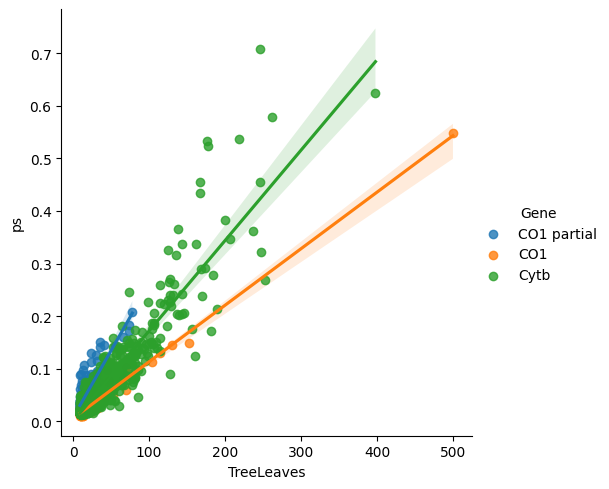

In [12]:
sns.lmplot(ps_df, y='ps', x='TreeLeaves', hue='Gene')

In [13]:
ps_df.corr('spearman')

/tmp/ipykernel_15450/2317787350.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ps_df.corr('spearman')


,Observed,Expected,ps,TreeLeaves,MSAsize
Observed,1.000000,0.202262,0.930156,0.811579,0.220622
Expected,0.202262,1.000000,-0.078984,0.169025,0.878820
ps,0.930156,-0.078984,1.000000,0.747998,-0.066059
TreeLeaves,0.811579,0.169025,0.747998,1.000000,0.201611
MSAsize,0.220622,0.878820,-0.066059,0.201611,1.000000


In [21]:
ps_df_gr = ps_df.merge(df_species)
ps_df_gr['ps_adj'] = ps_df_gr['ps'] / ps_df_gr['TreeLeaves']
ps_df_gr

,Gene,Species,Observed,Expected,ps,acc,taxa,Class,TreeLeaves,MSAsize,Climate_zone,Group,ps_adj
0,CO1,Anarhichas_lupus,29.994800,1115.000000,0.026901,KX118005.1.5478.7028_ARM57603.1,Chordata_7711;Actinopteri_186623;Perciformes_8...,Actinopteri,27,1548,temperate,Cold,0.000996
1,Cytb,Anarhichas_lupus,24.993910,843.629630,0.029627,LC493902.1.14378.15538_BBM34592.1,Chordata_7711;Actinopteri_186623;Perciformes_8...,Actinopteri,27,1140,temperate,Cold,0.001097
2,CO1,Anguilla_anguilla,86.491940,1144.565217,0.075568,KJ564270.1.5498.7090_AHN07125.1,Chordata_7711;Actinopteri_186623;Anguilliforme...,Actinopteri,46,1590,temperate,Cold,0.001643
3,Cytb,Anguilla_anguilla,100.936201,835.166667,0.120858,EU223997.1.1.>1141_ABW96976.1,Chordata_7711;Actinopteri_186623;Anguilliforme...,Actinopteri,48,1137,temperate,Cold,0.002518
4,CO1,Anguilla_rostrata,34.978240,1151.346154,0.030380,KJ564205.1.5490.7082_AHN06280.1,Chordata_7711;Actinopteri_186623;Anguilliforme...,Actinopteri,26,1590,subtropical,Warm,0.001168
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Cytb,Trisopterus_minutus,17.776390,783.782609,0.022680,KP644339.1.1.1161_AKH03836.1,Chordata_7711;Actinopteri_186623;Gadiformes_80...,Actinopteri,23,1101,temperate,Cold,0.000986
374,Cytb,Xenocypris_davidi,33.578140,823.678571,0.040766,KF039718.1.14413.15553_AGS43864.1,Chordata_7711;Actinopteri_186623;Cypriniformes...,Actinopteri,28,1137,subtropical,Warm,0.001456
375,Cytb,Xiphias_gladius,20.808420,837.538462,0.024845,EU224088.1.1.1141_ABW97067.1,Chordata_7711;Actinopteri_186623;Istiophorifor...,Actinopteri,13,1140,temperate,Cold,0.001911
376,Cytb,Xiphophorus_hellerii,33.467392,728.250000,0.045956,EF017548.1.1.1140_ABM05590.1,Chordata_7711;Actinopteri_186623;Cyprinodontif...,Actinopteri,28,1026,tropical,Warm,0.001641


Text(0, 0.5, 'ps (adjusted to tree size)')

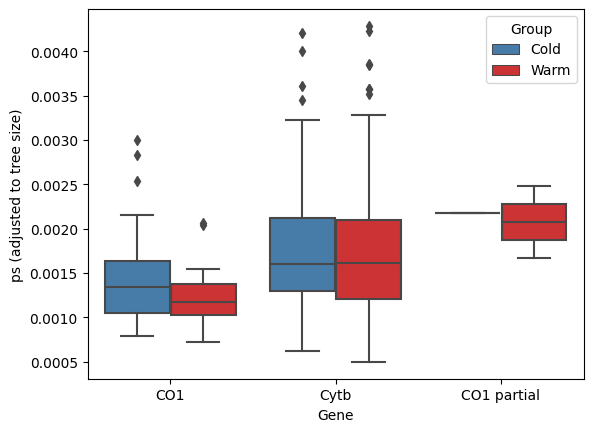

In [45]:
sns.boxplot(ps_df_gr, hue='Group', y='ps_adj', x='Gene', 
            palette=sns.palettes.color_palette('Set1', 2, )[::-1], 
            hue_order=['Cold', 'Warm'])
plt.ylabel('ps (adjusted to tree size)')

In [31]:
ps_df_gr.Climate_zone.unique()

array(['temperate', 'subtropical', 'polar', 'tropical', 'boreal'],
      dtype=object)

Text(0, 0.5, 'ps (adjusted to tree size)')

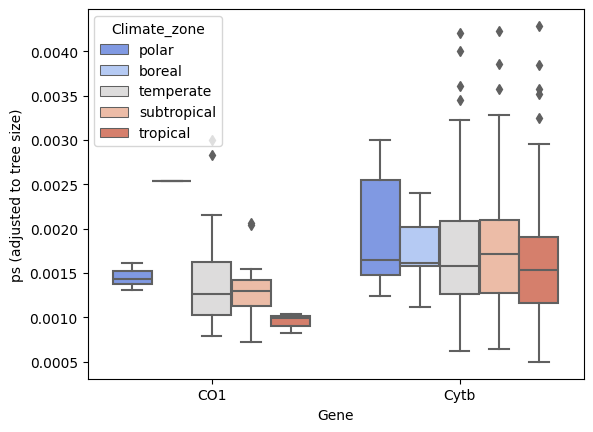

In [34]:
sns.boxplot(ps_df_gr, hue='Climate_zone', y='ps_adj', x='Gene', palette='coolwarm',
            order=['CO1', 'Cytb'],
            hue_order=['polar',  'boreal', 'temperate', 'subtropical', 'tropical',])
plt.ylabel('ps (adjusted to tree size)')

### Here we translate our mutspec with reverse on HEAVY CHAIN

In [7]:
# Function to translate mutspec from light to heavy chain
def getrevers(mut):
    translator = str.maketrans("ACGT", "TGCA")
    new_mut = mut[-1] + mut[1:-1] + mut[0]
    new_mut = new_mut.translate(translator)
    return new_mut

In [8]:
mutspecs['Mut'] = mutspecs.Mut.apply(getrevers)
mutspecs["MutBase"] = mutspecs.Mut.str.slice(2, 5)
mutspecs["Context"] = mutspecs.Mut.str.get(0) + mutspecs.Mut.str.get(2) + mutspecs.Mut.str.get(-1)
mutspecs.head()

,Gene,Class,Species,Mut,Observed,Expected,MutSpec,Climate_zone,Group,MutBase,Context
0,CO1,Actinopteri,Thymallus_thymallus,T[T>G]T,0.0,0.000,0.0,temperate,Cold,T>G,TTT
1,CO1,Actinopteri,Thymallus_thymallus,G[T>G]T,0.0,0.000,0.0,temperate,Cold,T>G,GTT
2,CO1,Actinopteri,Thymallus_thymallus,C[T>G]T,0.0,0.000,0.0,temperate,Cold,T>G,CTT
3,CO1,Actinopteri,Thymallus_thymallus,A[T>G]T,0.0,0.000,0.0,temperate,Cold,T>G,ATT
4,CO1,Actinopteri,Thymallus_thymallus,T[T>G]G,0.0,13.125,0.0,temperate,Cold,T>G,TTG


In [9]:
### CONTROL CHECK 
### Check that mutspec df is on heavy chain
### Most common MutBase is C>T, so it's heavy chain
mutspecs.groupby(['MutBase']).MutSpec.mean().reset_index().sort_values(by='MutSpec', ascending=False)

,MutBase,MutSpec
5,C>T,0.026354
1,A>G,0.010760
10,T>C,0.009802
6,G>A,0.006729
4,C>G,0.002161
8,G>T,0.001431
3,C>A,0.001021
2,A>T,0.000940
11,T>G,0.000899
0,A>C,0.000899


## 12 component spectra

In [10]:
mutspecs.groupby(['Gene', 'MutBase']).MutSpec.mean().unstack()[['A>G','G>A','C>T','T>C']]

MutBase,A>G,G>A,C>T,T>C
Gene,,,,
CO1,0.011155,0.009033,0.023270,0.010016
CO3,0.011995,0.007851,0.023305,0.009663
Cytb,0.010936,0.006447,0.026920,0.009454
ND2,0.008475,0.005942,0.026927,0.012130


In [11]:
transitions = ['A>G','G>A','C>T','T>C']

In [12]:
mutspecs.groupby(['Gene', 'Species', 'MutBase']).MutSpec.sum().reset_index().groupby(['Gene', 'MutBase']).MutSpec.mean().unstack()[transitions]

MutBase,A>G,G>A,C>T,T>C
Gene,,,,
CO1,0.178478,0.144533,0.372323,0.160253
CO3,0.191914,0.125610,0.372884,0.154606
Cytb,0.174980,0.103160,0.430725,0.151261
ND2,0.135599,0.095076,0.430838,0.194086


## TSSS gradient along major arc

In [13]:
# several species have 3 genes from major arc
_ = mutspecs.groupby(['Gene', 'Species', 'MutBase']).MutSpec.sum().reset_index()
_[['Gene', 'Species']].query('Gene != "ND2"').drop_duplicates().Species.value_counts()

Gadus_chalcogrammus           3
Phyllopteryx_taeniolatus      3
Thymallus_thymallus           3
Oncorhynchus_clarkii          3
Misgurnus_anguillicaudatus    3
                             ..
Engraulis_encrasicolus        1
Esox_lucius                   1
Etheostoma_blennioides        1
Etheostoma_caeruleum          1
Zoogoneticus_quitzeoensis     1
Name: Species, Length: 223, dtype: int64

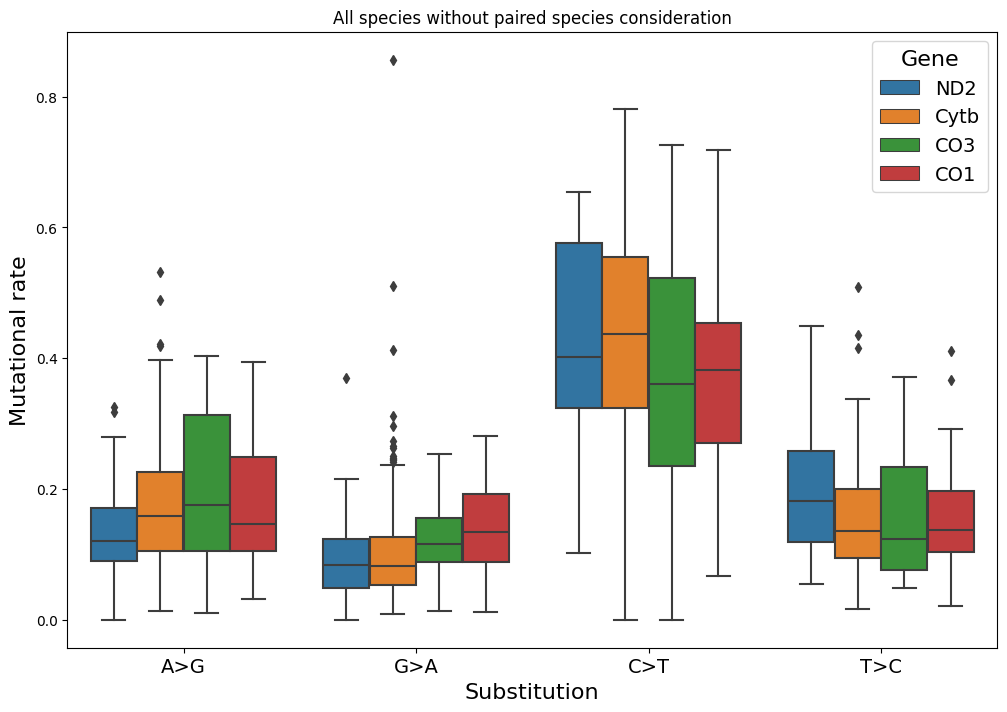

In [14]:
plt.figure(figsize=(12, 8))
_ = mutspecs.groupby(['Gene', 'Species', 'MutBase']).MutSpec.sum().reset_index()
sns.boxplot(_, hue='Gene', y='MutSpec', x='MutBase', hue_order=['ND2', 'Cytb', 'CO3', 'CO1'], order=transitions)
plt.ylabel('Mutational rate', fontsize=16)
plt.title('All species without paired species consideration')
plt.xlabel('Substitution', fontsize=16)
plt.xticks(fontsize=14)
plt.legend(fontsize=14, title='Gene', title_fontsize=16)

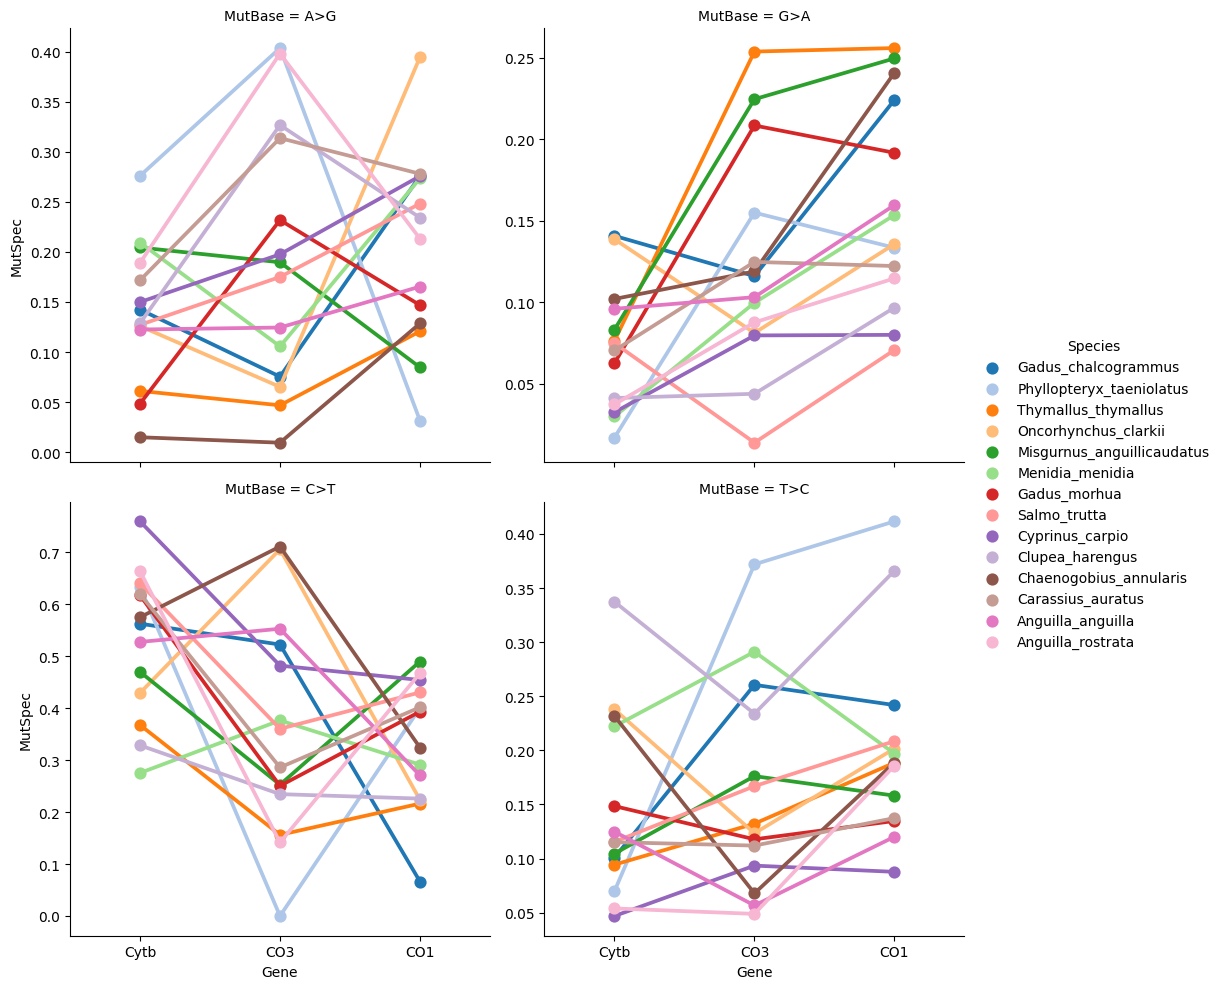

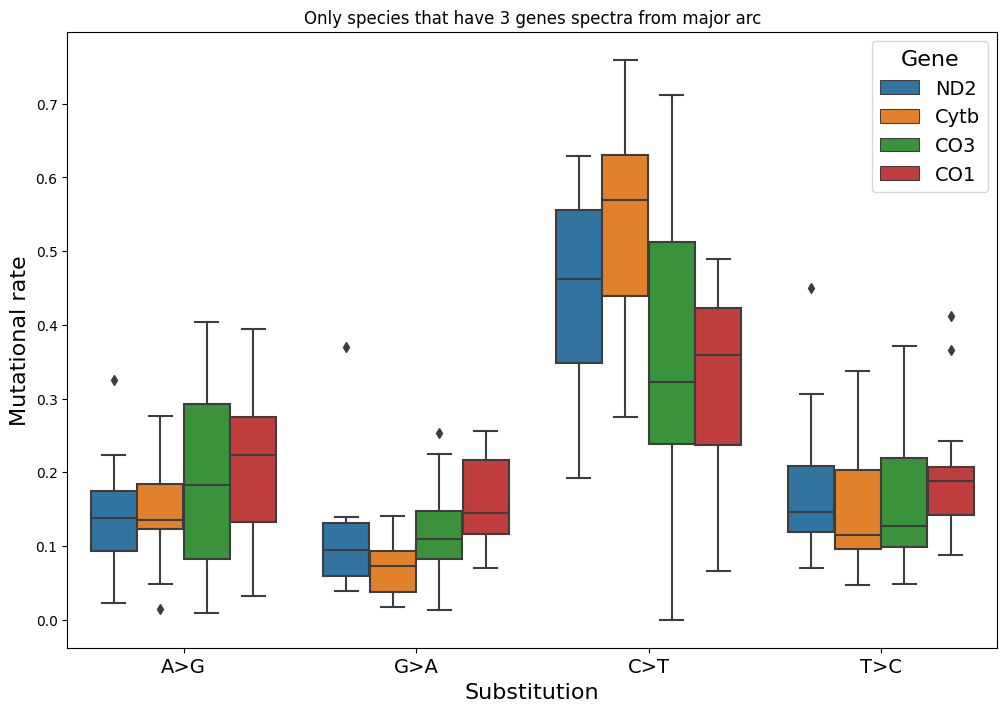

In [17]:
_ = mutspecs.groupby(['Gene', 'Species', 'MutBase']).MutSpec.sum().reset_index()
_species = _[['Gene', 'Species']].query('Gene != "ND2"').drop_duplicates().Species.value_counts()

g = sns.catplot(
    _, x='Gene', col='MutBase', y='MutSpec', hue='Species', col_wrap=2, 
    col_order=transitions, order=['Cytb', 'CO3', 'CO1'],
    kind='point', sharey=False, hue_order=_species[_species==3].index.values,
    palette='tab20',
)
g.savefig('../output/figures/major_arc_gradient_ts.pdf')
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(_[_.Species.isin(_species[_species==3].index.values)], hue='Gene', y='MutSpec', x='MutBase', hue_order=['ND2', 'Cytb', 'CO3', 'CO1'], order=transitions)
plt.ylabel('Mutational rate', fontsize=16)
plt.xlabel('Substitution', fontsize=16)
plt.title('Only species that have 3 genes spectra from major arc')
plt.xticks(fontsize=14)
plt.legend(fontsize=14, title='Gene', title_fontsize=16)
plt.savefig('../output/figures/major_arc_gradient_ts_box.pdf')
plt.show()

## Cold vs Warm spectra192

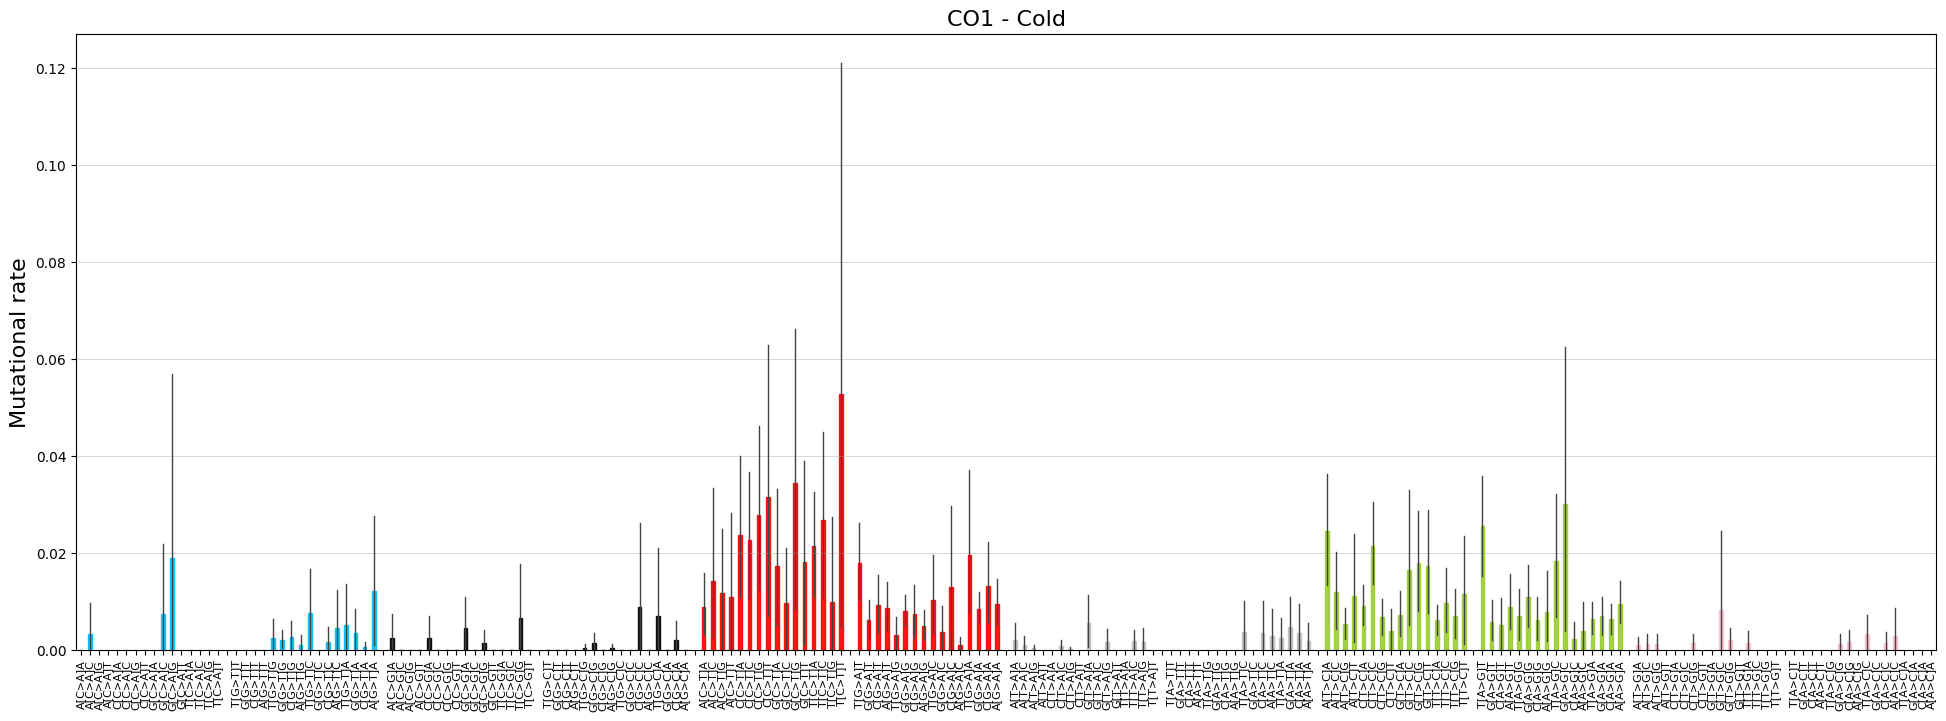

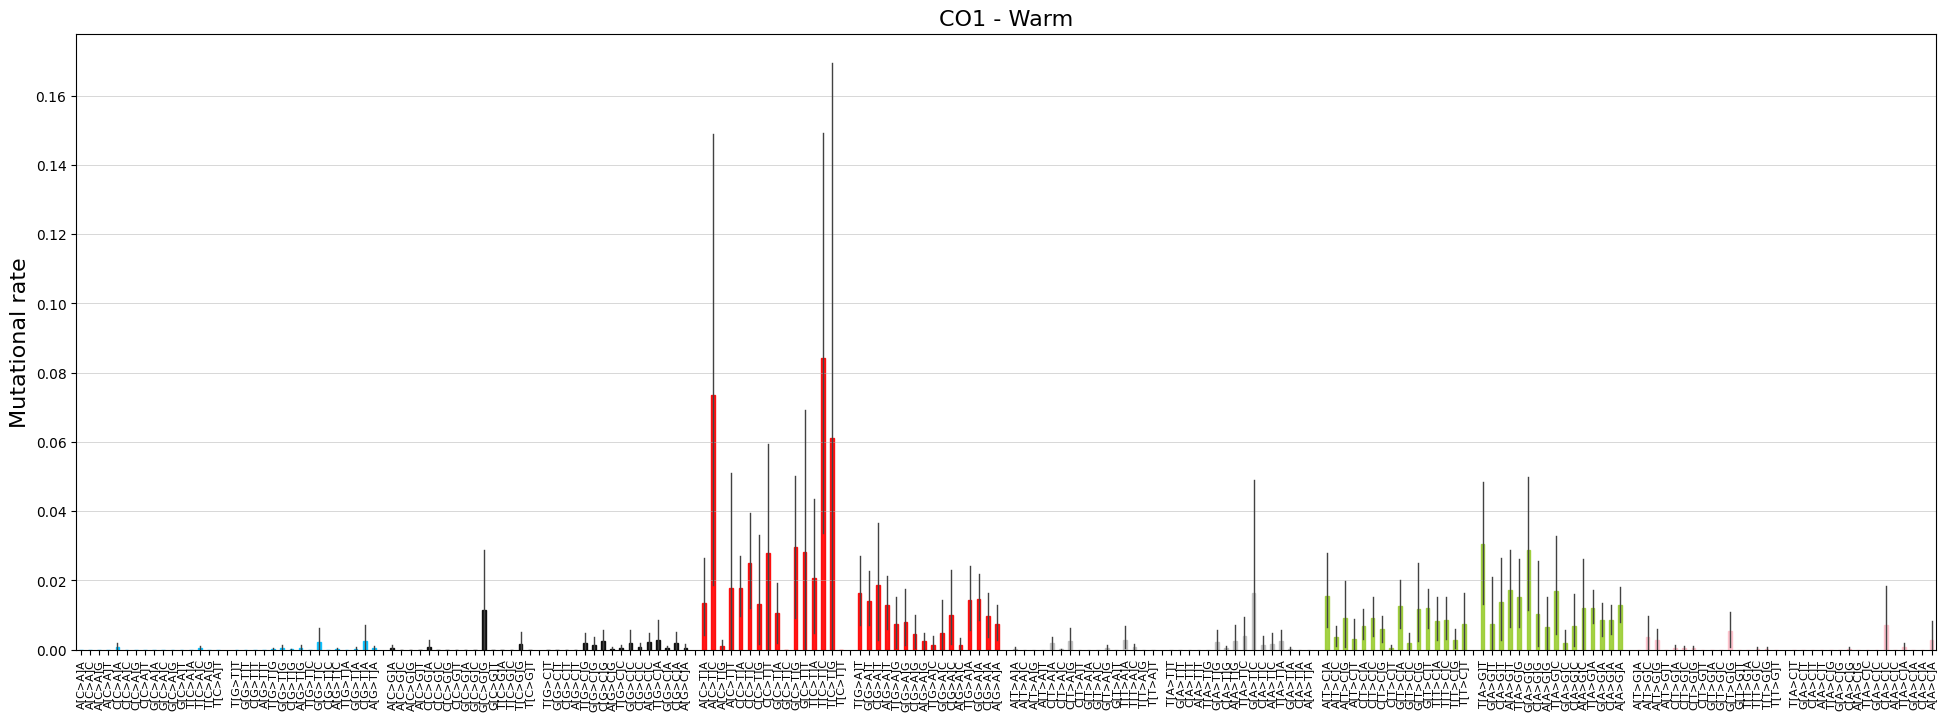

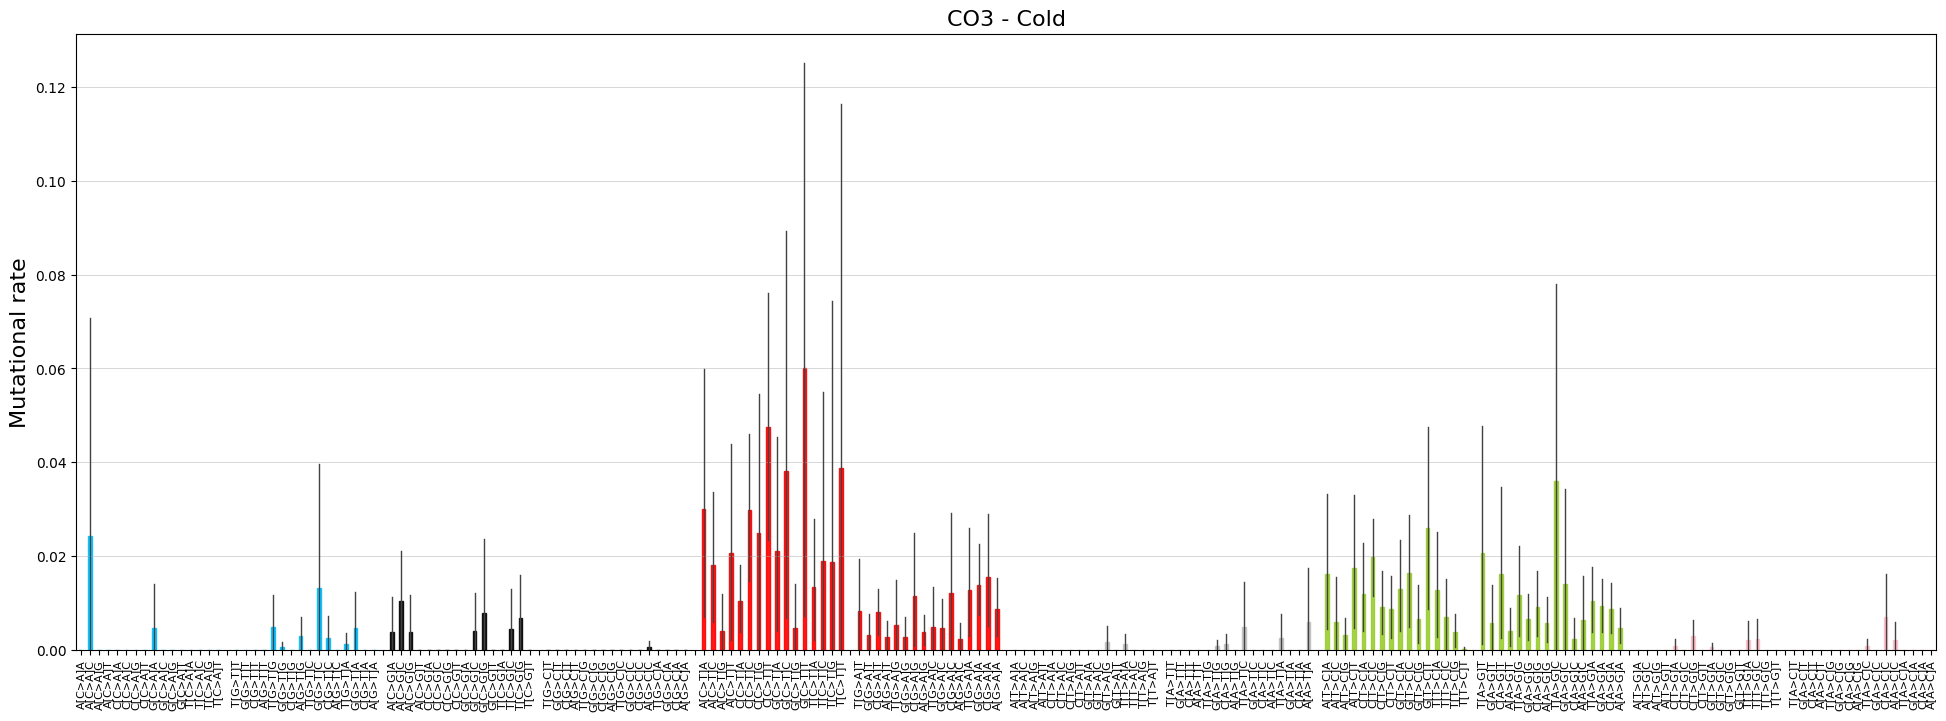

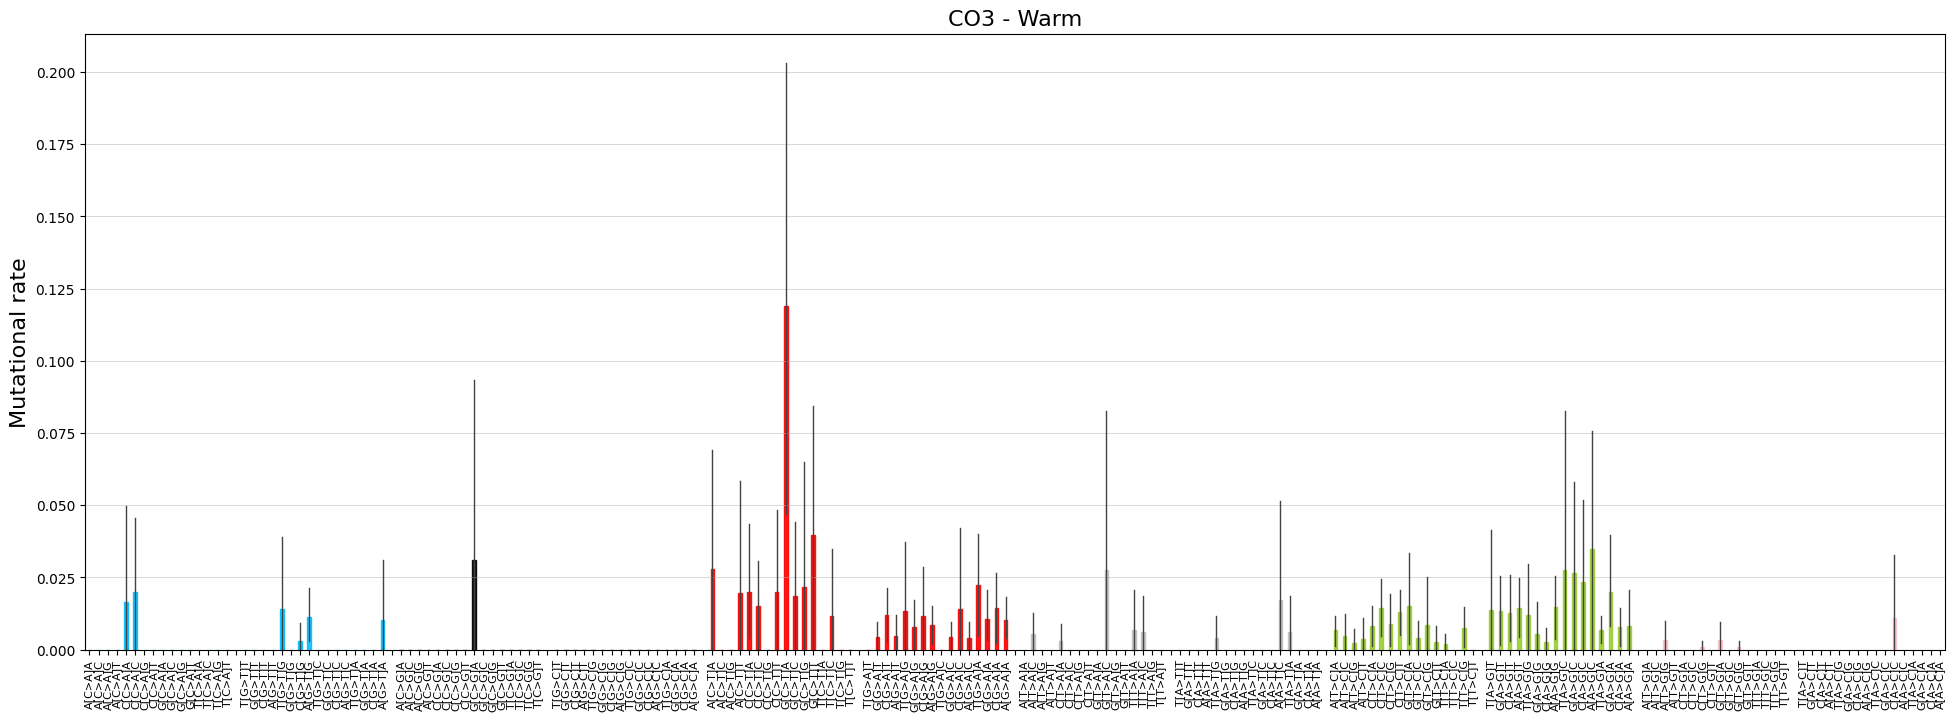

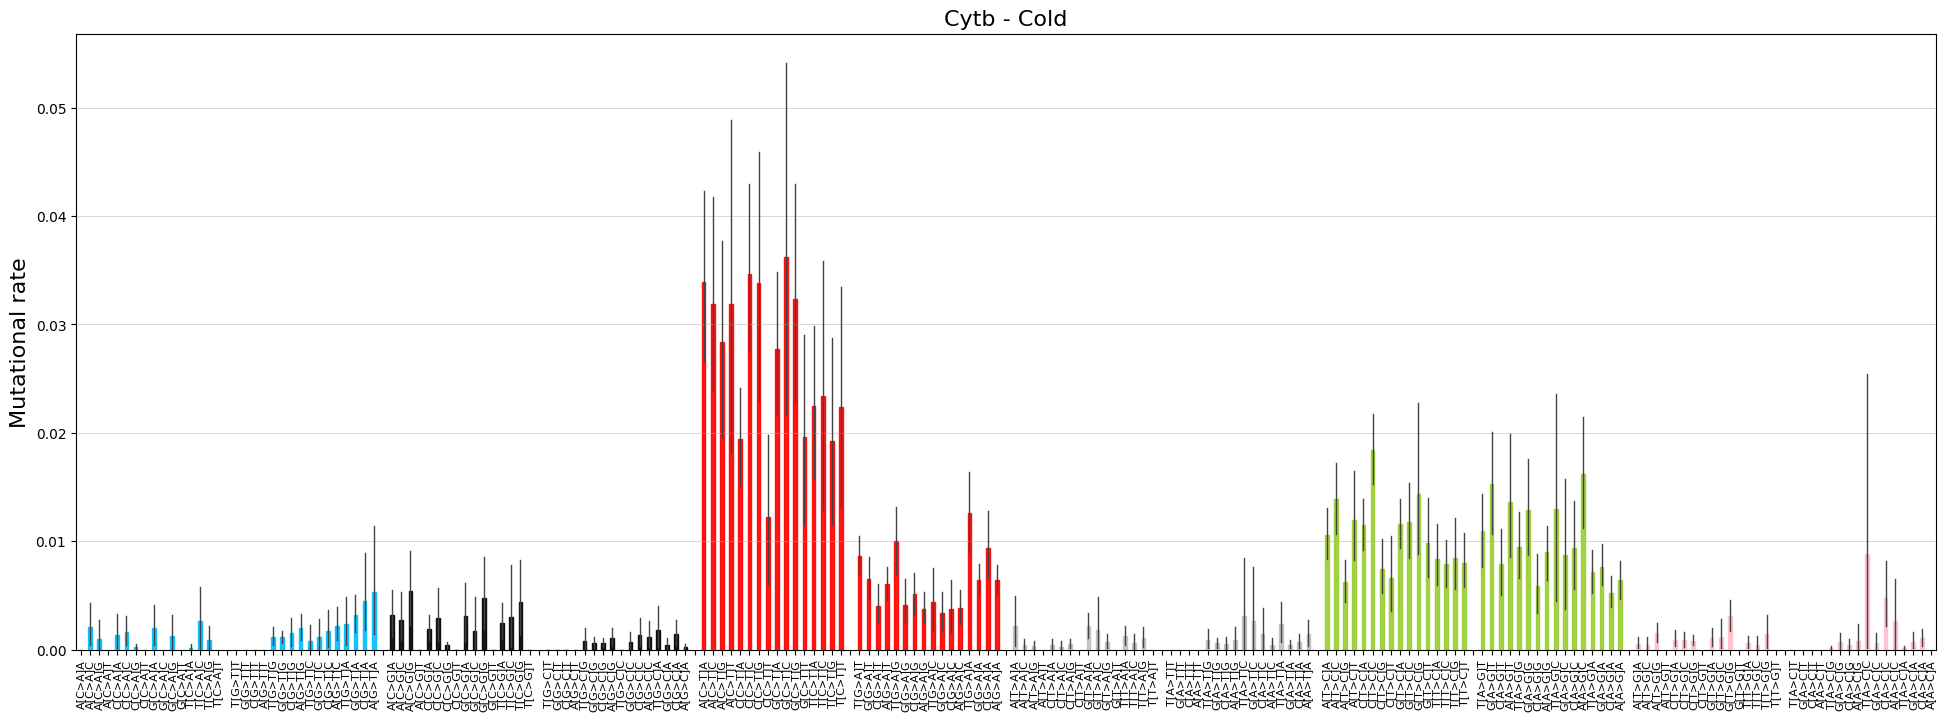

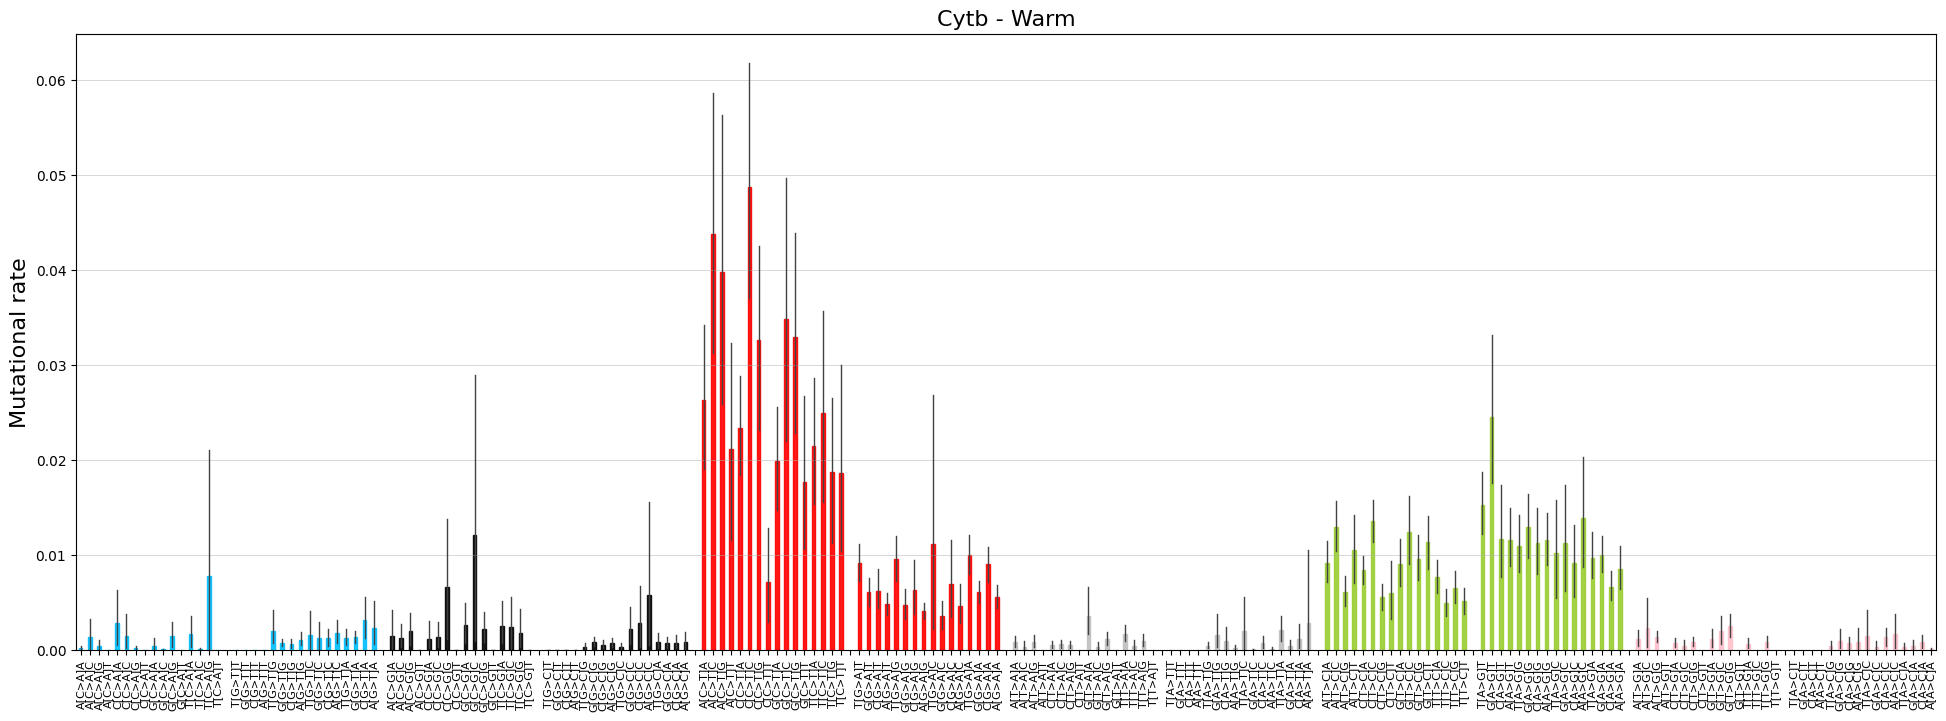

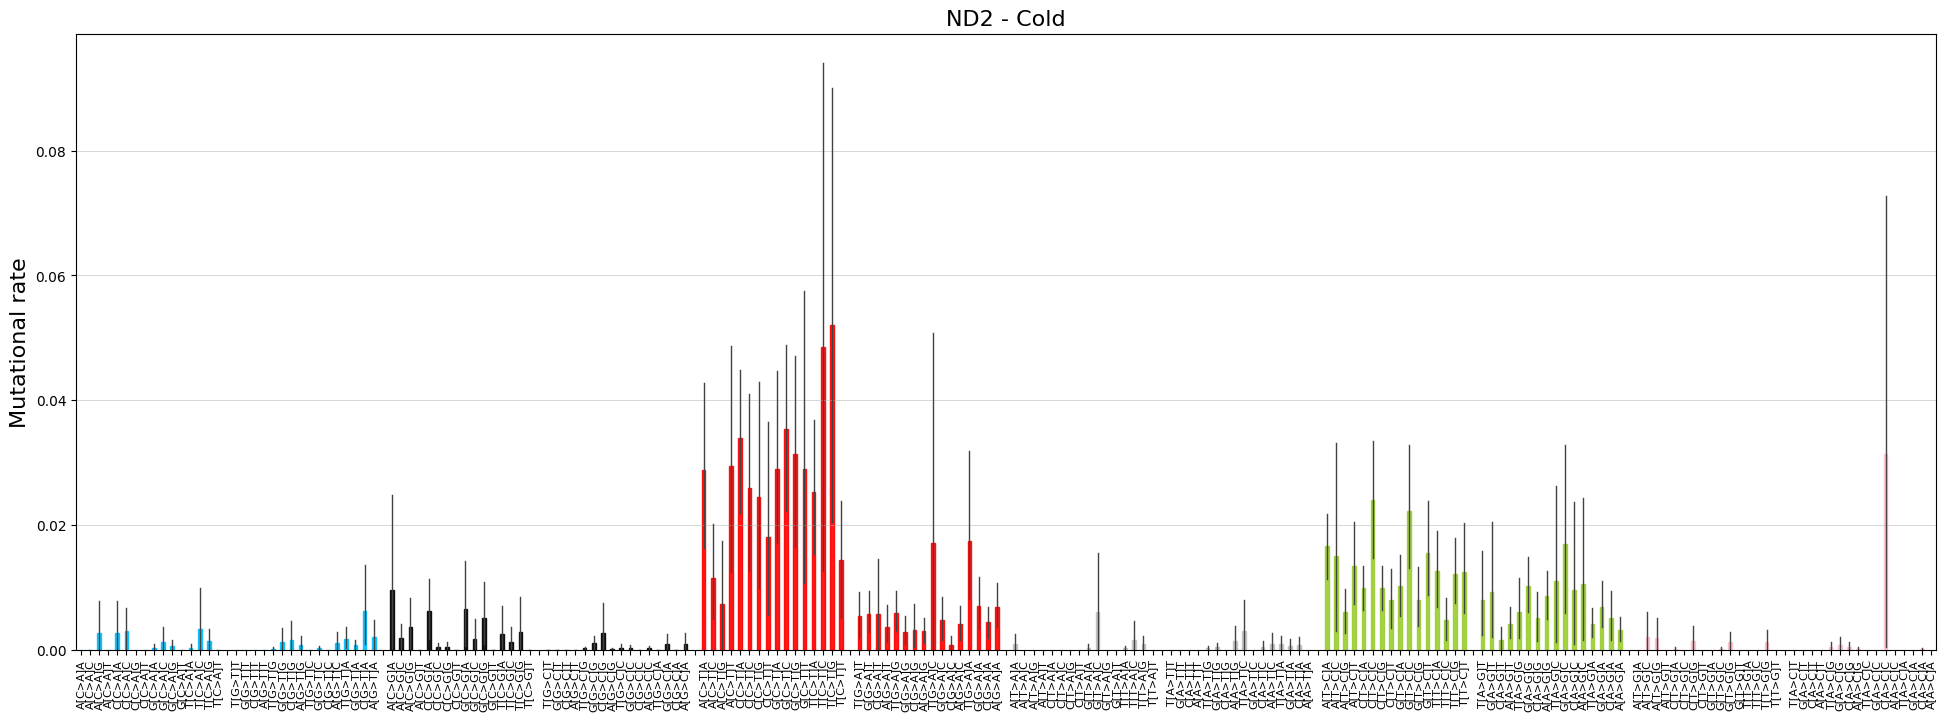

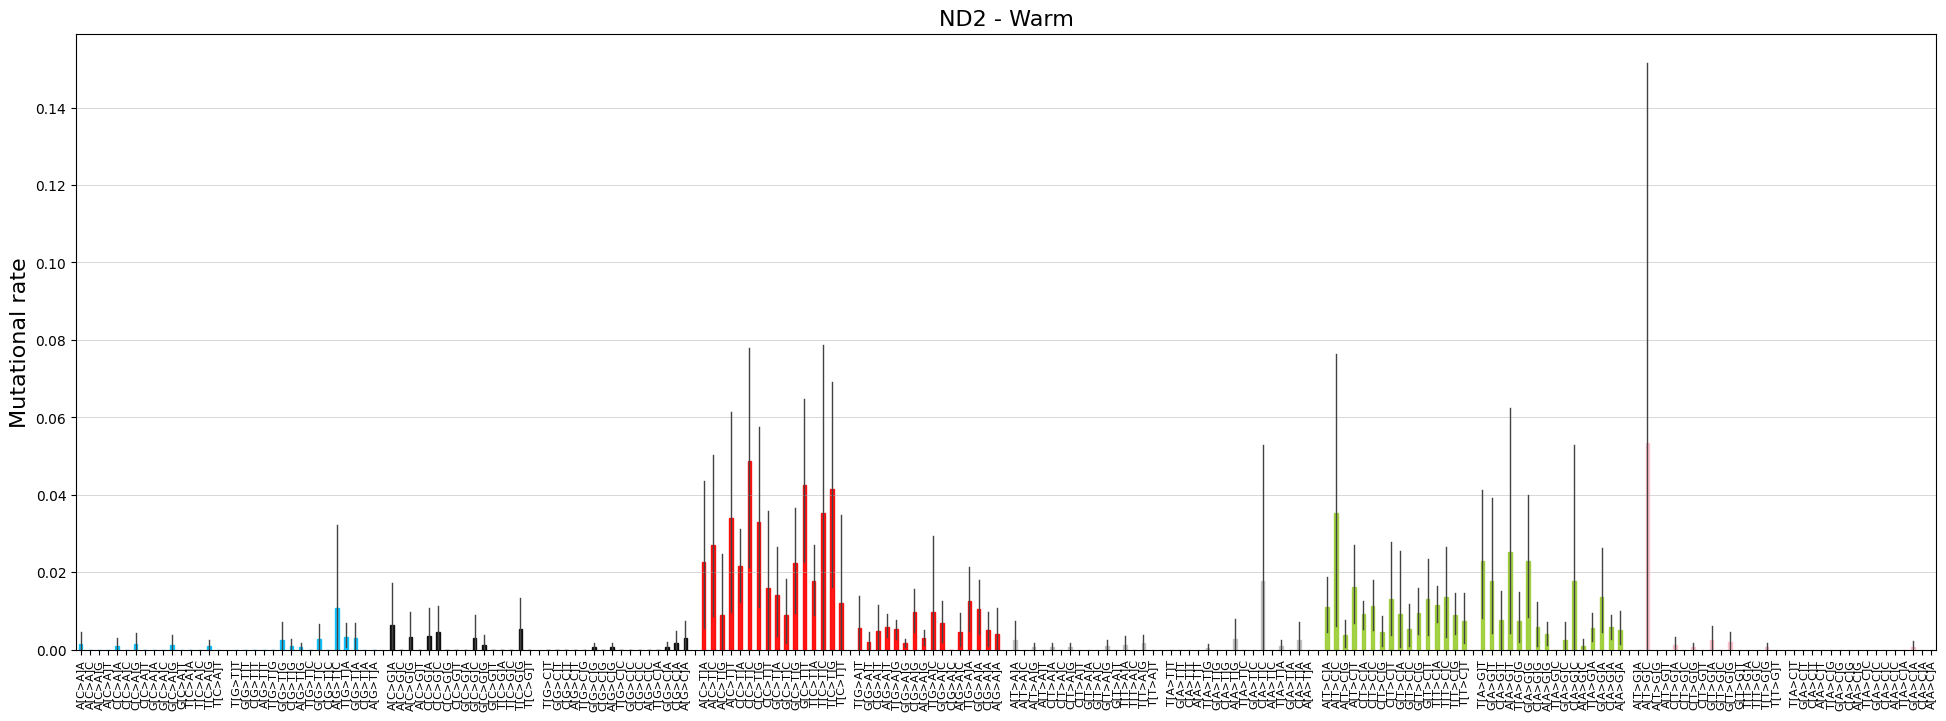

In [93]:
for (gene, gr), df_gr in mutspecs.groupby(['Gene', 'Group',]):
    plot_mutspec192(df_gr, title=f'{gene} - {gr}', 
                savepath=f'../output/figures/spectra192/MutSpec192_{gene}_{gr}.pdf',
                ylabel='Mutational rate',
                ticksize=8, )

In [27]:
mean_spectra = mutspecs.groupby(['Gene', 'Group', 'Mut']).MutSpec.mean().unstack()
mean_spectra.to_csv('../data/mean_groups_spectra192.csv')
mean_spectra

Mut          A[A>C]A   A[A>C]C   A[A>C]G  A[A>C]T   A[A>G]A   A[A>G]C  \
Gene Group                                                              
CO1  Cold   0.000000  0.002831  0.000000      0.0  0.009445  0.003817   
     Warm   0.002732  0.000000  0.000000      0.0  0.012862  0.012094   
CO3  Cold   0.000000  0.001954  0.000000      0.0  0.004647  0.006216   
     Warm   0.000000  0.000000  0.000000      0.0  0.008265  0.034665   
Cytb Cold   0.000000  0.002676  0.000803      0.0  0.006420  0.016240   
     Warm   0.000058  0.001642  0.000797      0.0  0.008510  0.013802   
ND2  Cold   0.000000  0.000000  0.000111      0.0  0.003147  0.010527   
     Warm   0.000000  0.000000  0.000000      0.0  0.005076  0.000903   

Mut          A[A>G]G   A[A>G]T   A[A>T]A   A[A>T]C  ...   T[T>A]G  T[T>A]T  \
Gene Group                                          ...                      
CO1  Cold   0.007833  0.008865  0.001804  0.002798  ...  0.001557      0.0   
     Warm   0.006370  0.017255  0.000000  0.001601  ...  0.000000      0.0   
CO3  Cold   0.005637  0.004023  0.005808  0.000000  ...  0.000000      0.0   
     Warm   0.014654  0.014529  0.000000  0.017108  ...  0.000000      0.0   
Cytb Cold   0.008976  0.013599  0.001416  0.000375  ...  0.001026      0.0   
     Warm   0.011536  0.011534  0.002776  0.000106  ...  0.000941      0.0   
ND2  Cold   0.008587  0.004143  0.000000  0.000901  ...  0.000815      0.0   
     Warm   0.003931  0.025210  0.000000  0.000000  ...  0.001594      0.0   

Mut          T[T>C]A   T[T>C]C   T[T>C]G   T[T>C]T   T[T>G]A   T[T>G]C  \
Gene Group                                                               
CO1  Cold   0.006141  0.009682  0.006963  0.011378  0.001296  0.000000   
     Warm   0.008157  0.008400  0.002635  0.007488  0.000000  0.000212   
CO3  Cold   0.012762  0.006960  0.003637  0.000186  0.002034  0.002140   
     Warm   0.001812  0.000000  0.007404  0.000000  0.000000  0.000000   
Cytb Cold   0.008332  0.007931  0.008480  0.007980  0.000619  0.000426   
     Warm   0.007596  0.004889  0.006502  0.005114  0.000590  0.000000   
ND2  Cold   0.012626  0.004781  0.012119  0.012483  0.000000  0.000000   
     Warm   0.011464  0.013503  0.008859  0.007275  0.000000  0.000000   

Mut          T[T>G]G  T[T>G]T  
Gene Group                     
CO1  Cold   0.000000      0.0  
     Warm   0.000252      0.0  
CO3  Cold   0.000000      0.0  
     Warm   0.000000      0.0  
Cytb Cold   0.001400      0.0  
     Warm   0.000753      0.0  
ND2  Cold   0.001200      0.0  
     Warm   0.000704      0.0  

[8 rows x 192 columns]

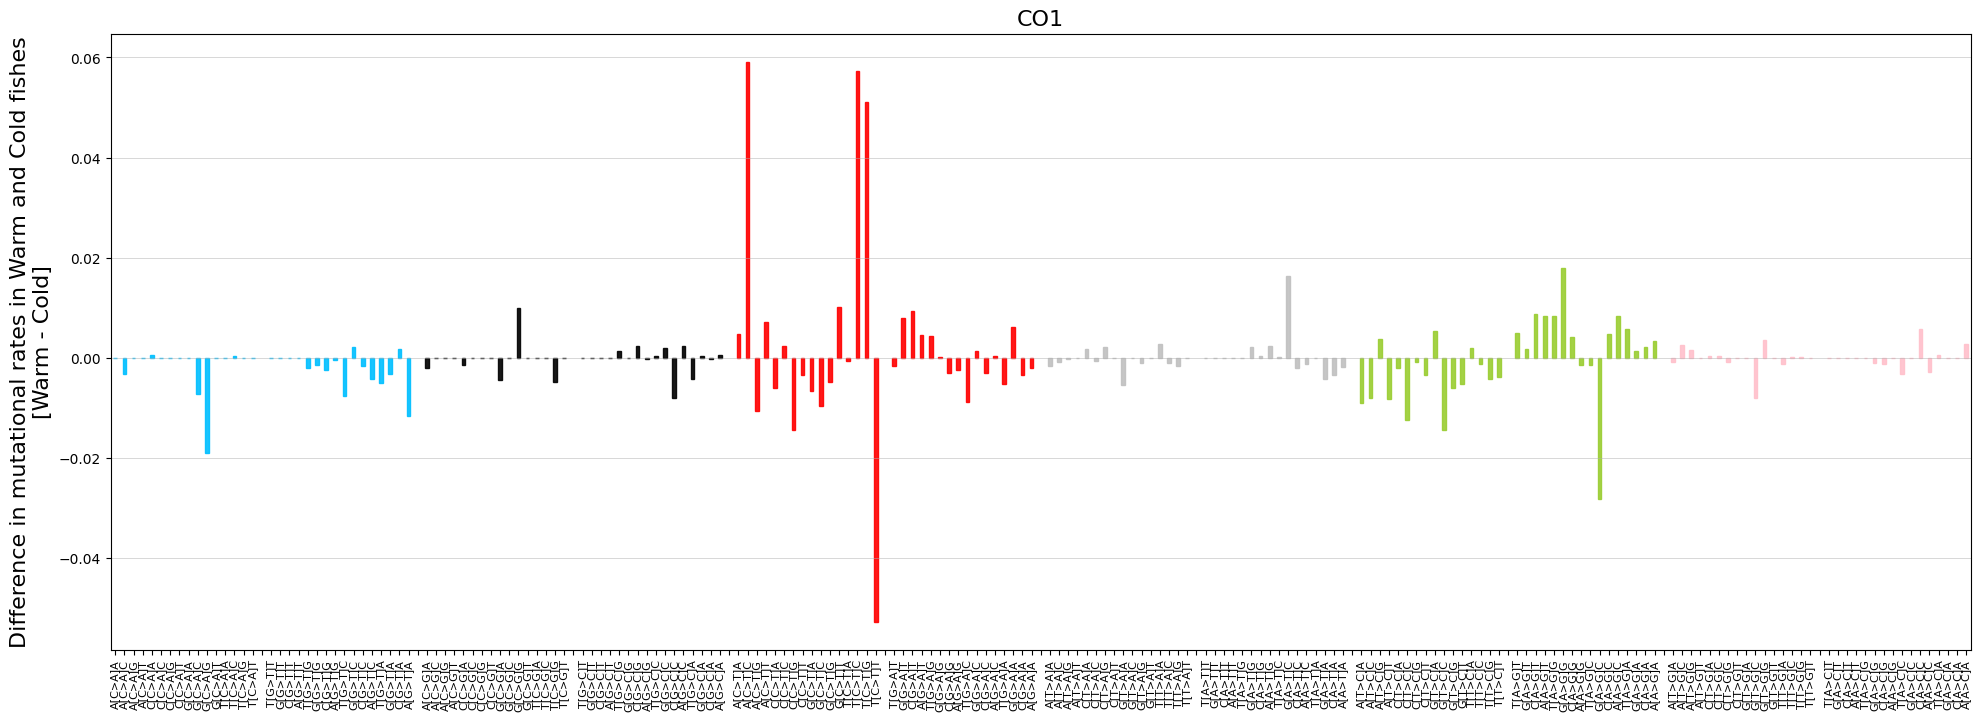

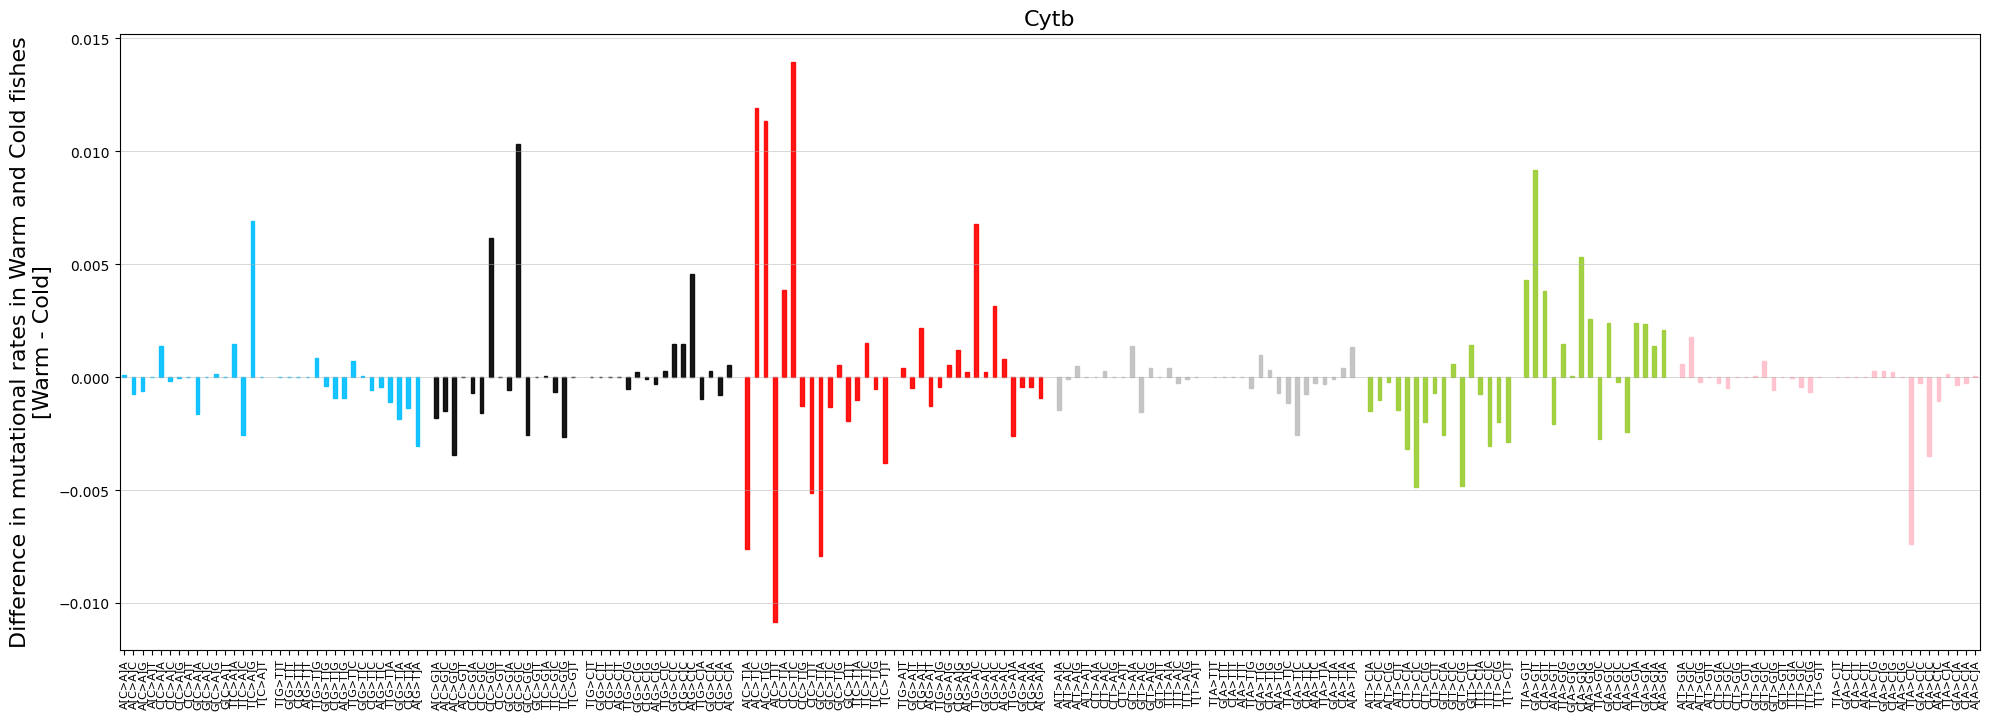

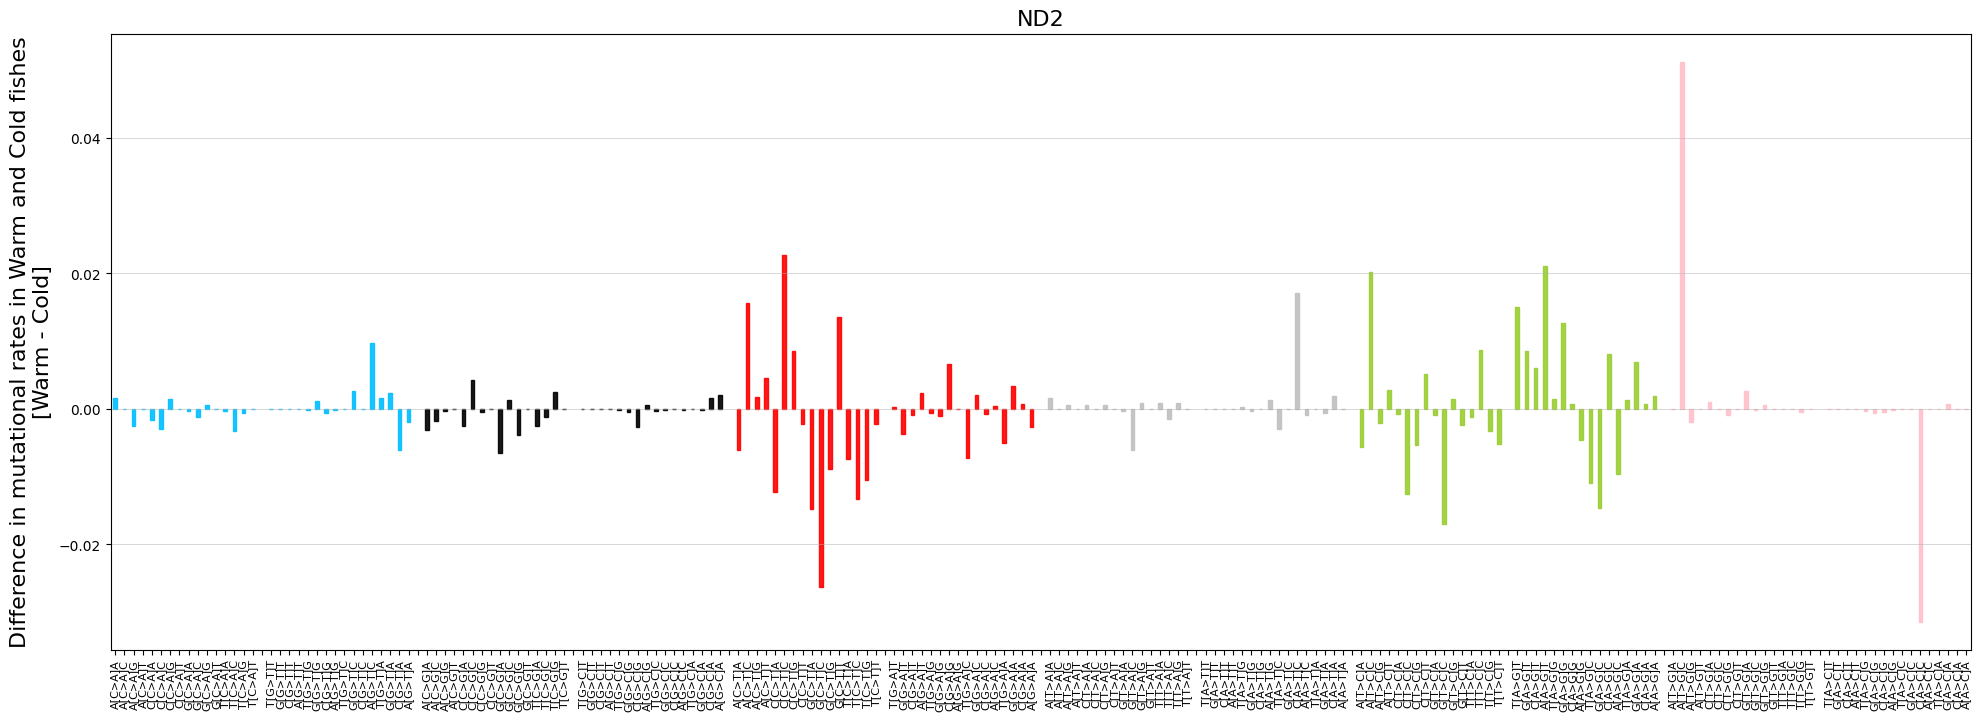

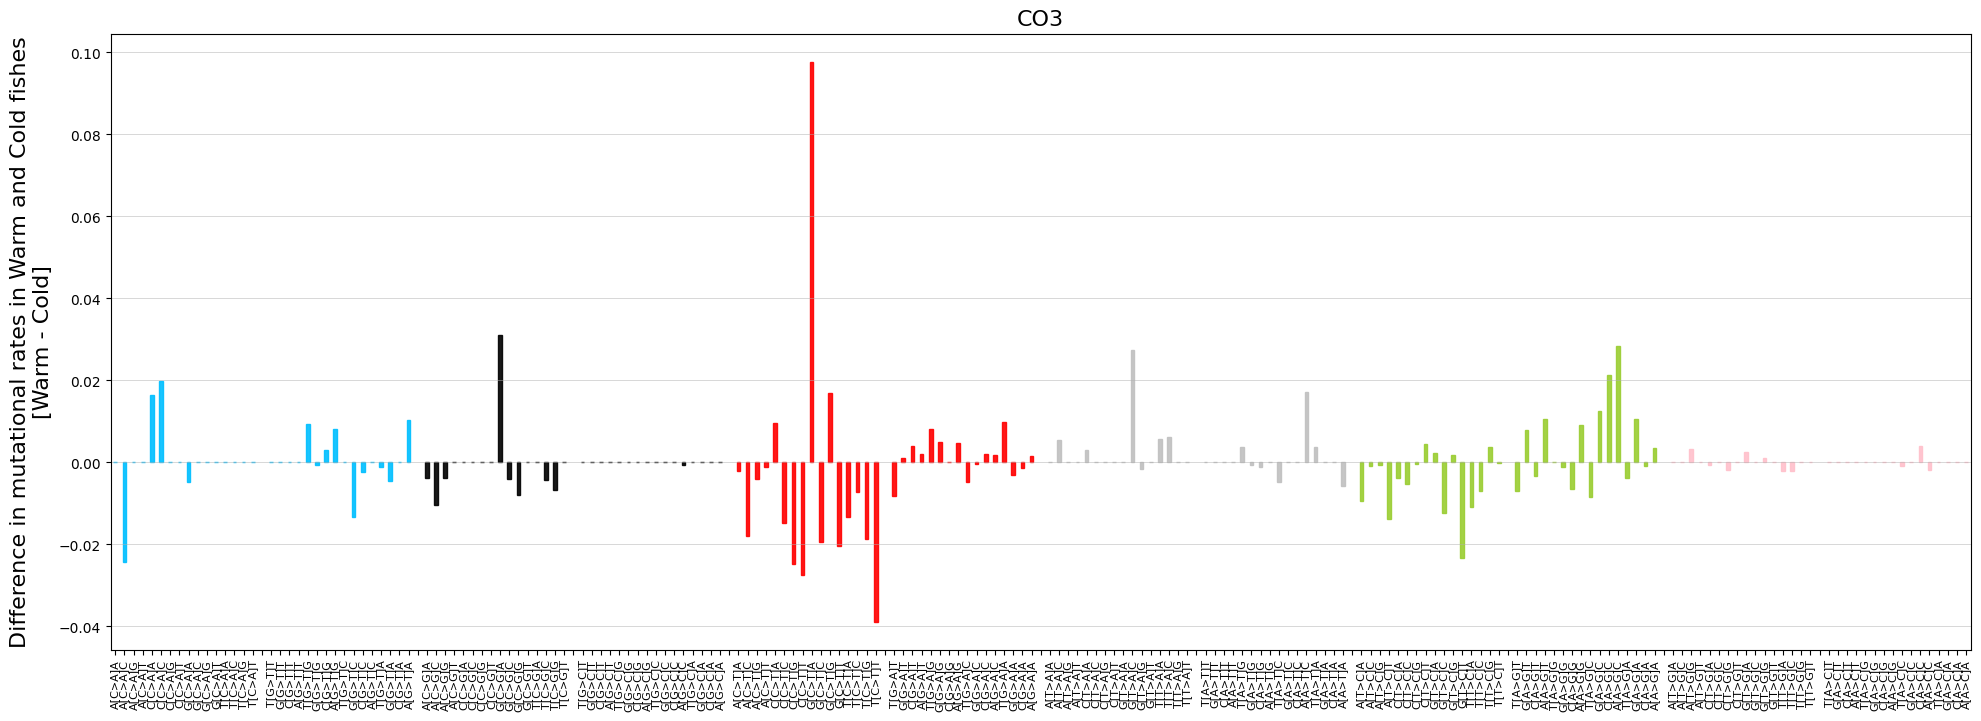

In [96]:
for gene in mutspecs.Gene.unique():
    # ms_cold = mean_spectra.loc[(gene, 'Cold')]
    # ms_warm = mean_spectra.loc[(gene, 'Warm')]
    ms = mean_spectra.loc[gene].T
    ms['Diff'] = ms['Warm'] - ms['Cold']
    Q1, Q3 = ms.Diff.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    
    ms['Outlier'] = ~ms['Diff'].between(lower_boundary, upper_boundary)
    
    plot_mutspec192(
        ms.reset_index(), 'Diff', title=gene, ticksize=8,
        ylabel='Difference in mutational rates in Warm and Cold fishes\n[Warm - Cold]',
        savepath=f'../output/figures/spectra192/MutSpec192_{gene}_Diff.pdf',
    )

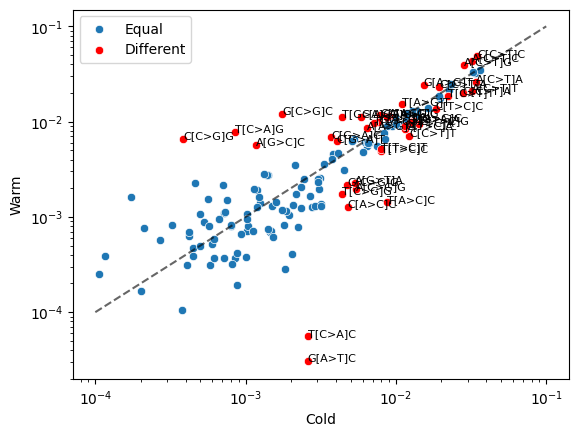

In [100]:
ms = mean_spectra.loc['Cytb'].T
ms['Diff'] = ms['Warm'] - ms['Cold']
Q1, Q3 = ms.Diff.quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

ms['Outlier'] = ~ms['Diff'].between(lower_boundary, upper_boundary)


plt.plot([1e-4, 1e-1], [1e-4, 1e-1], 'k--', alpha=0.6)
sns.scatterplot(ms[~ms.Outlier], x='Cold', y='Warm', label='Equal')
sns.scatterplot(ms[ms.Outlier], c='r', x='Cold', y='Warm', label='Different')

for mut, row in ms[ms.Outlier].iterrows():
    # if row.Cold > 0 and row.Warm > 0:
    plt.text(row.Cold, row.Warm, mut, {'fontsize': 8})


plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()